In [2]:
import pandas as pd
import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc={'axes.facecolor':'white','figure.facecolor':'white'})

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:456: UserWarning: matplotlibrc ps.usedistiller can not be set to xpdf unless xpdf-3.0 or later is installed on your system
  'xpdf unless xpdf-%s or later is installed on your system') % pdftops_req)


In [ ]:
rides = pd.read_csv('rides.csv')

In [ ]:
rides.head()

In [8]:
rides.describe()

,start_lat,start_lng,end_lat,end_lng,distance_miles,duration_secs,passenger_count
count,2835723.000000,2835723.000000,2835715.000000,2835715.000000,2835723.000000,2835723.000000,2835723.000000
mean,40.749596,-73.975251,40.750119,-73.974743,2.967321,747.643958,1.743615
std,0.027221,0.036386,0.030818,0.035539,3.431376,541.307909,1.414146
min,40.080708,-74.673485,40.055046,-74.772507,0.000000,-10.000000,0.000000
25%,40.735657,-73.992622,40.734795,-73.991821,1.000000,367.000000,1.000000
50%,40.752319,-73.982330,40.752762,-73.981117,1.940000,600.000000,1.000000
75%,40.765671,-73.969101,40.766369,-73.966469,3.250000,960.000000,2.000000
max,41.758438,-71.757393,41.756645,-71.757393,50.000000,7200.000000,6.000000


In [9]:
rides.dtypes

hack_license         object
pickup_datetime      object
start_lat           float64
start_lng           float64
dropoff_datetime     object
end_lat             float64
end_lng             float64
distance_miles      float64
duration_secs         int64
passenger_count       int64
dtype: object

In [1]:
print len(rides)

NameError: name 'rides' is not defined

In [11]:
#pickup = pd.DatetimeIndex(rides['pickup_datetime'])

In [12]:
#dropoff = pd.DatetimeIndex(rides['dropoff_datetime'])

In [13]:
#rides['pickup'] = pickup

In [14]:
#rides['dropoff'] = dropoff

In [15]:
#rides.dtypes

In [16]:
#print min(rides['pickup']), max(rides['pickup'])

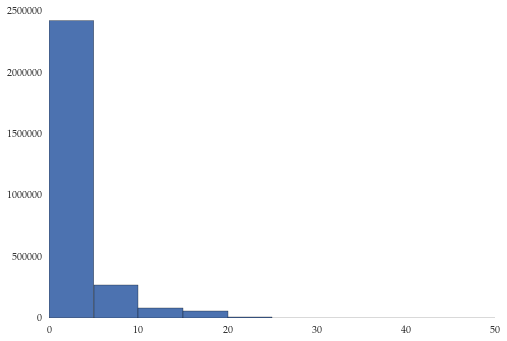

In [17]:
plt.hist(rides['distance_miles'])
plt.show()

#### Most of the rides are low distance (even below 1 mile). We keep the distances that are 0. As we only have granularity to the scale of the mile we can imagine ride that are below that threshold

In [18]:
# Some rides have negative duration time which is weird
print 1.*len(rides[rides['duration_secs']<0])/len(rides)

3.24432252374e-05


In [19]:
# However it is only a tiny fraction of the data so we can remove these points

In [20]:
# What is the minimum time in seconds if we exclude rides that have negative duration?
clean = rides[rides['duration_secs']>0]
print min(clean['duration_secs'])

1


In [21]:
# 1s! It is way to low to be real. 

#### In the following we will remove all rides that are less than 2 minutes

In [22]:
rides2 = rides[rides['duration_secs']>=120]

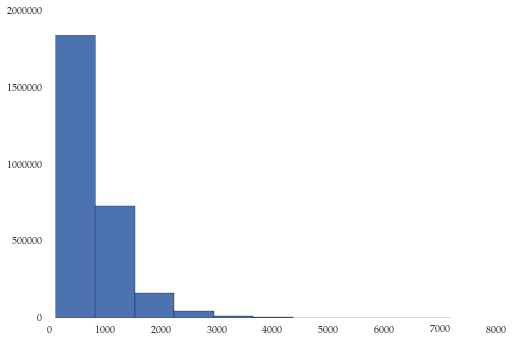

In [23]:
plt.hist(rides2['duration_secs'])
plt.show()

In [24]:
# This confirm that people tend to take Lyft for small distances and quick drives

In [25]:
#dates_pickup = pickup.date

In [26]:
#dates_dropoff = dropoff.date

In [27]:
# What is the dates range?
#print np.unique(dates_pickup)

In [28]:
#rides['dates_pickup'] = dates_pickup

In [29]:
#rides['dates_dropoff'] = dates_dropoff

In [30]:
#rides.head()

In [31]:
rides2 = rides[rides['duration_secs']>=120]
print len(rides2)

2792091


In [32]:
# To get a sense of the hot spots we restrict the dataset to one day for plotting purposes

In [33]:
one_day = rides2[0:200000]
#one_day = rides2[rides2['dates_pickup']==rides2['dates_pickup'][0]]

In [34]:
print len(one_day)
print np.median(one_day['start_lat']), np.median(one_day['start_lng'])

200000
40.752533 -73.98214


In [35]:
#import folium

In [36]:
# Create map of the different pickup locations
#map = folium.Map(location=[40.749954,-73.983711],
#    zoom_start=5)

#for _, df in one_day.iterrows():
#    map.circle_marker(
#        location=[df['start_lat'], df['start_lng']],
#        radius=20,
#    )

#map.create_map(path='pickups.html')

#### The data are located in New York. Let's overplot some well-known destinations to get a sense of the hot spots

In [37]:
# Times Square
times_square = [40.75773, -73.985708]
# Financial District
financial_district = [40.707499, -74.011153]
# LaGuardia
laguardia = [40.77725, -73.872611]
# JFK
jfk = [40.639722, -73.778889]
# Central Park
central_park = [40.783333, -73.966667]

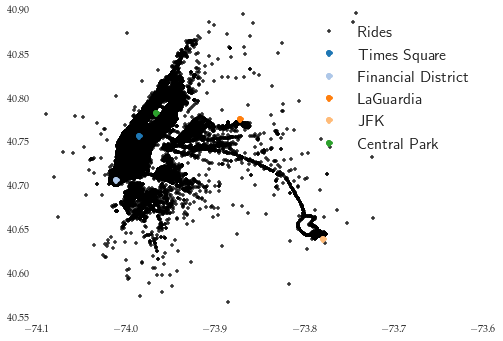

In [38]:
plt.plot(one_day['start_lng'], one_day['start_lat'], '.', color='k', alpha=0.8)
plt.plot(times_square[1], times_square[0], 'o', color=tableau20[0])
plt.plot(financial_district[1], financial_district[0], 'o', color=tableau20[1])
plt.plot(laguardia[1], laguardia[0], 'o', color=tableau20[2])
plt.plot(jfk[1], jfk[0], 'o', color=tableau20[3])
plt.plot(central_park[1], central_park[0], 'o', color=tableau20[4])
plt.xlim(-74.1, -73.6)
plt.ylim(40.55, 40.9)
plt.legend(['Rides', 'Times Square', 'Financial District', 'LaGuardia', 'JFK', 'Central Park'], ncol=1, frameon=False, fontsize=16) 
plt.show()

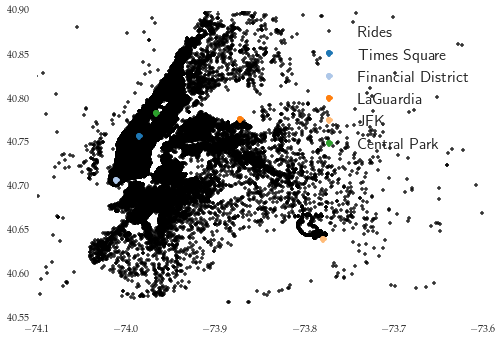

In [39]:
plt.plot(one_day['end_lng'], one_day['end_lat'], '.', color='k', alpha=0.8)
plt.plot(times_square[1], times_square[0], 'o', color=tableau20[0])
plt.plot(financial_district[1], financial_district[0], 'o', color=tableau20[1])
plt.plot(laguardia[1], laguardia[0], 'o', color=tableau20[2])
plt.plot(jfk[1], jfk[0], 'o', color=tableau20[3])
plt.plot(central_park[1], central_park[0], 'o', color=tableau20[4])
plt.xlim(-74.1, -73.6)
plt.ylim(40.55, 40.9)
plt.legend(['Rides', 'Times Square', 'Financial District', 'LaGuardia', 'JFK', 'Central Park'], ncol=1, frameon=False, fontsize=16) 
plt.show()

In [41]:
from sklearn.cluster import KMeans

In [42]:
#k_means = KMeans(n_clusters=5)

In [43]:
pickup_data = one_day[['start_lat','start_lng']]
pickup_data.head()

,start_lat,start_lng
0,40.761032,-73.987091
1,40.773907,-73.873360
2,40.761890,-73.986977
3,40.765141,-73.980568
4,40.731152,-73.982193


In [44]:
print min(pickup_data['start_lat']), max(pickup_data['start_lat']), min(pickup_data['start_lng']), max(pickup_data['start_lng'])

40.567997 41.151501 -74.51667 -73.124023


In [55]:
xpickup_data = np.array(pickup_data)

In [56]:
k_range = range(1, 10)
k_means_var = [KMeans(n_clusters=k).fit(xpickup_data) for k in k_range]

In [57]:
# Find the cluster center for each model
centroids = [X.cluster_centers_ for X in k_means_var]

In [67]:
from scipy.spatial.distance import cdist, pdist

In [68]:
# Calculate the Euclidian distance for each point to the center
k_euclid = [cdist(xpickup_data, cent, 'euclidean') for cent in centroids]

In [69]:
dist = [np.min(ke, axis=1) for ke in k_euclid]

In [70]:
# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

In [ ]:
# Total sum of squares
tss = sum(pdist(xpickup_data)**2)/xpickup_data.shape[0]

In [111]:
pickup_data['labels'] = k_means.labels_

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


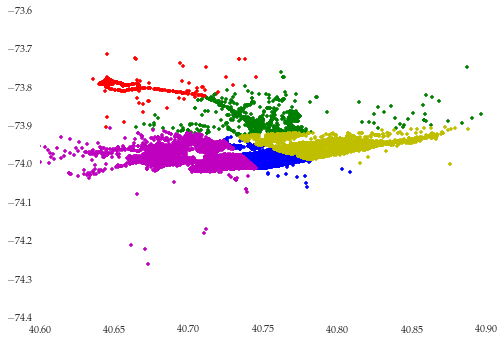

In [115]:
plt.plot(pickup_data['start_lat'][pickup_data['labels']==0], pickup_data['start_lng'][pickup_data['labels']==0], '.', color='b')
plt.plot(pickup_data['start_lat'][pickup_data['labels']==1], pickup_data['start_lng'][pickup_data['labels']==1], '.', color='r')
plt.plot(pickup_data['start_lat'][pickup_data['labels']==2], pickup_data['start_lng'][pickup_data['labels']==2], '.', color='g')
plt.plot(pickup_data['start_lat'][pickup_data['labels']==3], pickup_data['start_lng'][pickup_data['labels']==3], '.', color='m')
plt.plot(pickup_data['start_lat'][pickup_data['labels']==4], pickup_data['start_lng'][pickup_data['labels']==4], '.', color='y')
plt.ylim(-74.4, -73.6)
plt.xlim(40.6, 40.9)
plt.show()